### Домашнее задание к уроку 8. АБ-тестирование

Взять датасет: https://drive.google.com/file/d/101fYypHh0u56KC5Lq2ywOCOdnh7WPho2/view

Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import proportion

import warnings
warnings.filterwarnings('ignore')

Описание датасета:
   1. user_id: идентификатор пользователя
   2. date_served: дата события
   3. marketing_channel: рекламный канал
   4. variant: показанный вариант рекламы
   5. converted: конверсия в покупку, 1 - пользователь совершил покупку, 0 - нет

In [2]:
df = pd.read_csv('data/marketing_campaign.csv')
df.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,1.0
1,a1001,1/1/18,House Ads,personalization,English,1.0
2,a1002,1/1/18,House Ads,personalization,English,1.0


Посмотрим на распределение control и personalization:

In [3]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [4]:
df['converted'].value_counts()

0.0    8946
1.0    1076
Name: converted, dtype: int64

Посчитаем конверсию в покупку в разных группах:

In [5]:
k_control = df[df['variant']=='control']['converted'].sum()
n_control = df[df['variant']=='control']['converted'].shape[0]
k_pers = df[df['variant']=='personalization']['converted'].sum()
n_pers = df[df['variant']=='personalization']['converted'].shape[0]

k_control, n_control, k_pers, n_pers

(371.0, 5091, 705.0, 4946)

In [6]:
p_control = k_control / n_control
p_pers = k_pers / n_pers

print(f'Конверсия в покупку в группе control = {p_control*100:.2f}%')
print(f'Конверсия в покупку в группе personalization = {p_pers*100:.2f}%')

Конверсия в покупку в группе control = 7.29%
Конверсия в покупку в группе personalization = 14.25%


Конверсия выше в группе personalization - 14.25%, это почти в 2 раза выше конверсии в группе control, т.о. и без критериев понятно, что отличие значимое.

И полученное значение логично, т.к. при персонализации предложения отклик будет выше.

Проверим, значимо ли это отличие статистически.

У нас 2 гипотезы:
- "нулевая" (H0) - наблюдаемые различия незначимы
- "альтернативная" (H1) - различия значимы

In [7]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k_control, k_pers]), 
                                                   np.array([n_control, n_pers]))

print(f'z_score = {z_score:.3f}, pvalue = {z_pvalue:.3f}')

z_score = -11.279, pvalue = 0.000


In [9]:
z_crit_value = 1.96 #соответствует доверительному интервалу в 95%

if abs(z_score) > z_crit_value:
    print("Мы можем отвергнуть нулевую гипотезу -> отличие статистически значимо.")
else:
    print("Нулевая гипотеза принята -> отличие статистически не значимо.")

Мы можем отвергнуть нулевую гипотезу -> отличие статистически значимо.


Посмотрим визуально на группы:

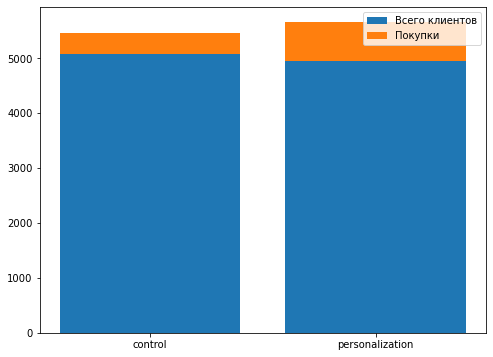

In [10]:
grouped = df.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
plt.figure(figsize=(8,6))
plt.bar([1,2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1,2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Покупки')
plt.xticks([1,2], ['control', 'personalization'])
plt.legend()

### Выводы: 

Конверсия в покупку в группе personalization (14.25%) значительно выше конверсии в покупку в группе control (7.29%).

Значимость отличий подтвердилась статистически.